<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


/var/folders/l1/j1rvgvqd1xs797_htym_r1780000gn/T/ipykernel_15742/3711022408.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  religion_divorce['divorced'] = np.where(religion_divorce['marriage_type'] == 3, 1, 0)


<Axes: xlabel='religion', ylabel='divorced'>

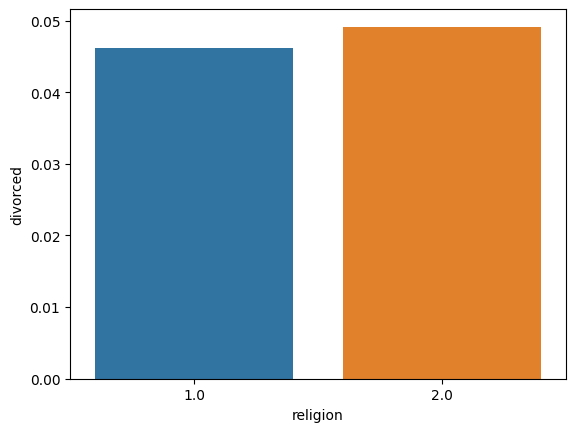

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# 데이터 불러오기
raw_welfare = pd.read_spss('../Koweps_hpwc14_2019_beta2.sav')

# 복수본 만들기
welfare = raw_welfare.copy()

# 데이터 검토하기
welfare # 앞부분, 뒷부분 출력
welfare.shape # 행, 열 개수 출력
welfare.info() # 변수 속성 출력
welfare.describe() # 요약 통계량

welfare = welfare.rename(columns = {
    'h14_g3' : 'sex',
    'h14_g4' : 'birth',
    'h14_g10' : 'marriage_type',
    'h14_g11' : 'religion',
    'p1402_8aq1' : 'income',
    'h14_eco9' : 'code_job',
    'h14_reg7' : 'code_region'
})
# 종교와 이혼 변수 선택
religion_divorce = welfare[['religion', 'marriage_type']]

# 종교와 이혼 여부 변환
religion_divorce['divorced'] = np.where(religion_divorce['marriage_type'] == 3, 1, 0)

# 종교별 이혼 비율 계산
divorce_ratio = religion_divorce.groupby('religion')['divorced'].mean().reset_index()

# 시각화
sns.barplot(data=divorce_ratio, x='religion', y='divorced')

